# Part 3 : Data Analysis

Research Questions
1. What is the average price of a house in Bay Area/ each Bay Area city?
2. Is there a correlation between the square footage of a house and its price in the Bay Area?
3. What is the common features of the houses that are sold in Bay area? I.e. how many bedrooms and baths?
4. Are there any cities in the Bay Area are generally more expensive/cheap than others?
5. What are the features(variables) of a house that influence the price of a house? 

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LinearRegression
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

#from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [3]:
#read the csv
df = pd.read_csv('cleaned_redfinhouse_v5.csv')
df.head(5)

,Unnamed: 0,street,city,state,zipcode,price,bedroom,bath,Sq.ft,price per Sq.Ft,house_size,bed_bath_ratio,price_comparison
0,0,1221 Harrison St #20,San Francisco,CA,94110,1035000.00,1,2.00,1439,719.25,small,0.50,lower
1,2,1714 24th Ave,San Francisco,CA,94122,2099000.00,5,3.00,2304,911.02,medium,1.67,higher
2,3,1934 - 1936 19th Ave,San Francisco,CA,94116,1395000.00,4,3.00,2740,509.12,large,1.33,higher
3,4,130 Wilson Ave,San Francisco,CA,94112,875000.00,4,3.00,1400,625.00,small,1.33,lower
4,5,1200 Gough St Unit 5 C,San Francisco,CA,94109-6609,795000.00,1,1.00,840,946.43,small,1.00,lower


In [4]:
#drop first columns 
df=df.drop(df.columns[0], axis=1)

#add id columns 
df['ID'] = [i for i in range(1,len(df)+1)]
df.head(5)

,street,city,state,zipcode,price,bedroom,bath,Sq.ft,price per Sq.Ft,house_size,bed_bath_ratio,price_comparison,ID
0,1221 Harrison St #20,San Francisco,CA,94110,1035000.00,1,2.00,1439,719.25,small,0.50,lower,1
1,1714 24th Ave,San Francisco,CA,94122,2099000.00,5,3.00,2304,911.02,medium,1.67,higher,2
2,1934 - 1936 19th Ave,San Francisco,CA,94116,1395000.00,4,3.00,2740,509.12,large,1.33,higher,3
3,130 Wilson Ave,San Francisco,CA,94112,875000.00,4,3.00,1400,625.00,small,1.33,lower,4
4,1200 Gough St Unit 5 C,San Francisco,CA,94109-6609,795000.00,1,1.00,840,946.43,small,1.00,lower,5


In [5]:
df.set_index('ID', inplace=True)
df.head(5)

,street,city,state,zipcode,price,bedroom,bath,Sq.ft,price per Sq.Ft,house_size,bed_bath_ratio,price_comparison
ID,,,,,,,,,,,,
1,1221 Harrison St #20,San Francisco,CA,94110,1035000.00,1,2.00,1439,719.25,small,0.50,lower
2,1714 24th Ave,San Francisco,CA,94122,2099000.00,5,3.00,2304,911.02,medium,1.67,higher
3,1934 - 1936 19th Ave,San Francisco,CA,94116,1395000.00,4,3.00,2740,509.12,large,1.33,higher
4,130 Wilson Ave,San Francisco,CA,94112,875000.00,4,3.00,1400,625.00,small,1.33,lower
5,1200 Gough St Unit 5 C,San Francisco,CA,94109-6609,795000.00,1,1.00,840,946.43,small,1.00,lower


In [6]:
#format zipcode to 5 digits
df['zipcode'] = df['zipcode'].str.slice(stop=5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 1 to 860
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   street            860 non-null    object 
 1   city              860 non-null    object 
 2   state             860 non-null    object 
 3   zipcode           860 non-null    object 
 4   price             860 non-null    float64
 5   bedroom           860 non-null    int64  
 6   bath              860 non-null    float64
 7   Sq.ft             860 non-null    int64  
 8   price per Sq.Ft   860 non-null    float64
 9   house_size        860 non-null    object 
 10  bed_bath_ratio    860 non-null    float64
 11  price_comparison  860 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 87.3+ KB


In [8]:
df.describe()

,price,bedroom,bath,Sq.ft,price per Sq.Ft,bed_bath_ratio
count,860.00,860.00,860.00,860.00,860.00,860.00
mean,1169554.47,2.88,2.05,1522.12,784.54,1.47
std,537607.59,1.15,0.76,587.80,258.62,0.53
min,139888.00,1.00,1.00,436.00,134.34,0.50
25%,760000.00,2.00,1.50,1119.75,622.88,1.00
50%,1099000.00,3.00,2.00,1412.00,762.99,1.50
75%,1495000.00,4.00,2.50,1866.00,937.62,1.67
max,2985000.00,7.00,4.50,3507.00,1684.62,4.00


The average house price in the city we collected is $1169554.47

In [9]:
df[df['price'] == max(df['price'])]

,street,city,state,zipcode,price,bedroom,bath,Sq.ft,price per Sq.Ft,house_size,bed_bath_ratio,price_comparison
ID,,,,,,,,,,,,
483,2077 Cully Pl,San Jose,CA,95124,2985000.00,4,4.50,2810,1062.28,large,0.89,higher


In [10]:
df[df['Sq.ft'] == max(df['Sq.ft'])]

,street,city,state,zipcode,price,bedroom,bath,Sq.ft,price per Sq.Ft,house_size,bed_bath_ratio,price_comparison
ID,,,,,,,,,,,,
120,57 - 61 Albion St,San Francisco,CA,94103,1600000.00,7,2.00,3507,456.23,large,3.50,higher


In [11]:
df[df['price per Sq.Ft'] == max(df['price per Sq.Ft'])]

,street,city,state,zipcode,price,bedroom,bath,Sq.ft,price per Sq.Ft,house_size,bed_bath_ratio,price_comparison
ID,,,,,,,,,,,,
122,814 Carolina St,San Francisco,CA,94107,1095000.00,1,1.00,650,1684.62,small,1.00,higher


# Entire dataset analysis

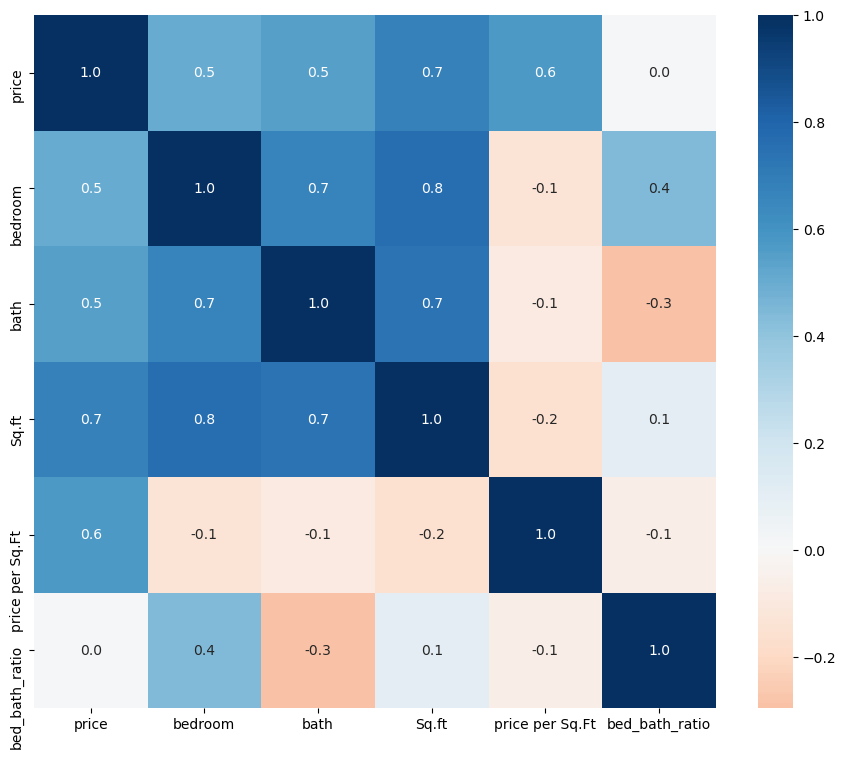

In [12]:
# Data Frame heat map

corr = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11, 9)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

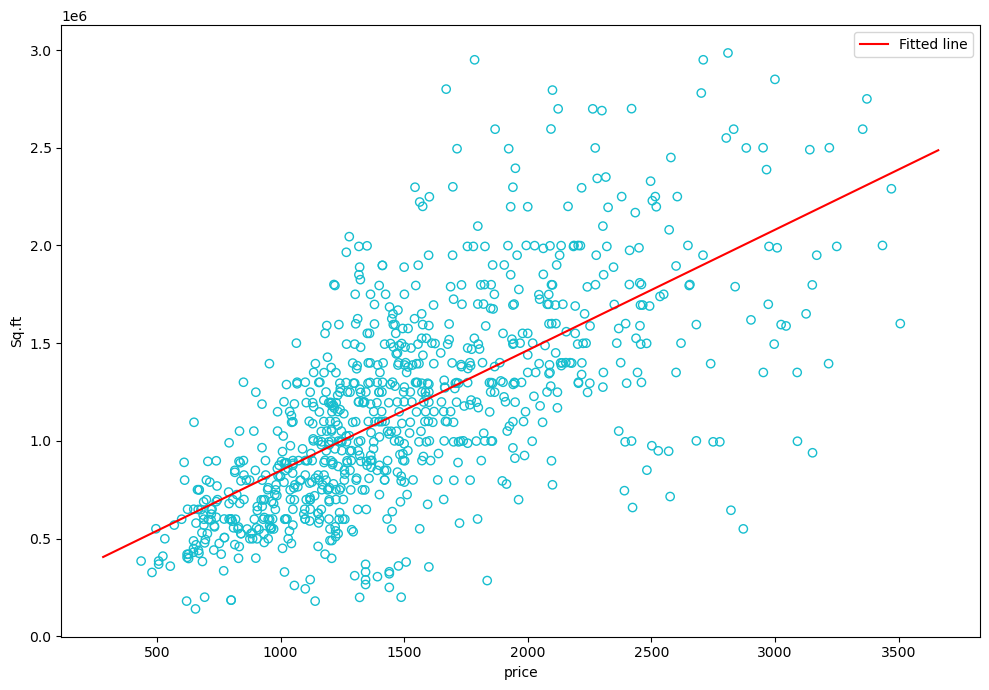

In [13]:
# Scatter plot looking at sq.ft  to price
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

ax.scatter(df['Sq.ft'], df['price'], color='C9', facecolor='none') #facecolor none leaves the bubble unfilled

# Fit a line to the data
slope, intercept = np.polyfit(df['Sq.ft'], df['price'], 1)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + slope * x_vals

# Plot the fitted line
ax.plot(x_vals, y_vals, color='r', label='Fitted line')

plt.xlabel('price')
plt.ylabel('Sq.ft')

plt.legend()  # Add a legend for the fitted line

plt.tight_layout()
plt.show()


The sq.ft and the house price has a correlation of 0.7

Text(0, 0.5, 'percentage of price')

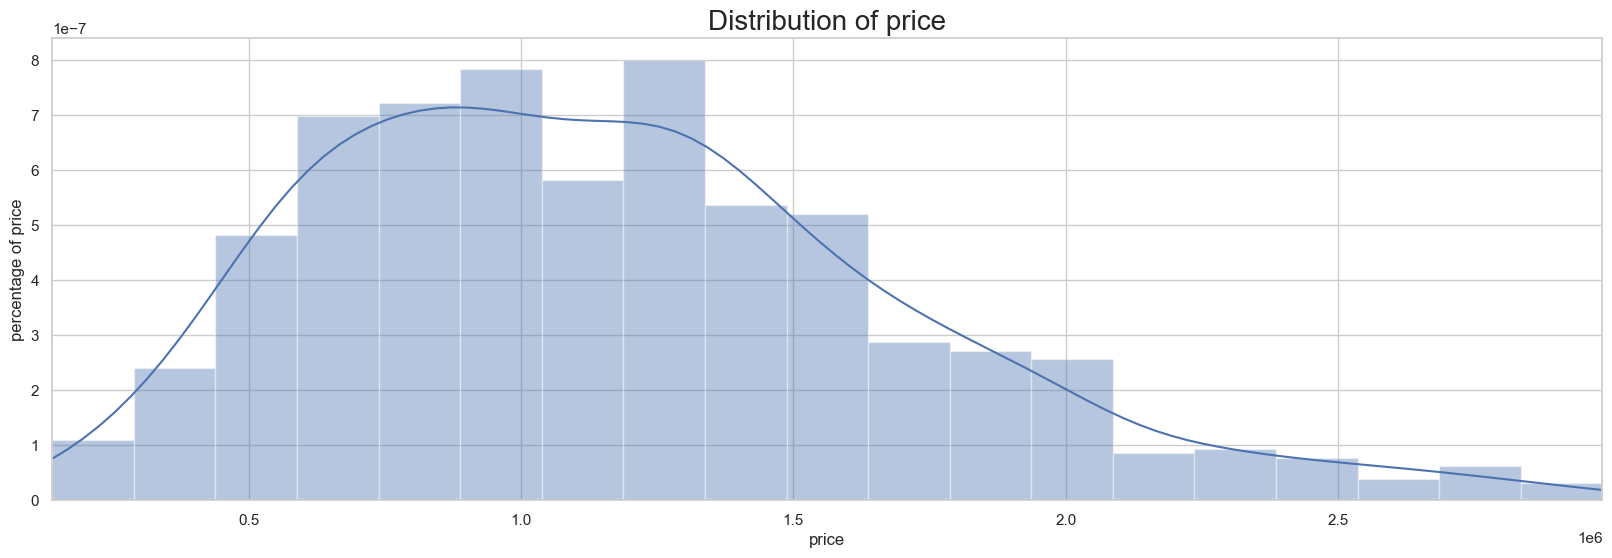

In [14]:
#Distribution of Price
plt.figure(figsize=(20, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['price'])
plt.title('Distribution of price', fontsize = 20)

min_price = df['price'].min()
max_price = df['price'].max()
plt.xlim(min_price, max_price)

plt.xlabel('price')
plt.ylabel('percentage of price')

Text(0, 0.5, 'percentage of Sq.ft')

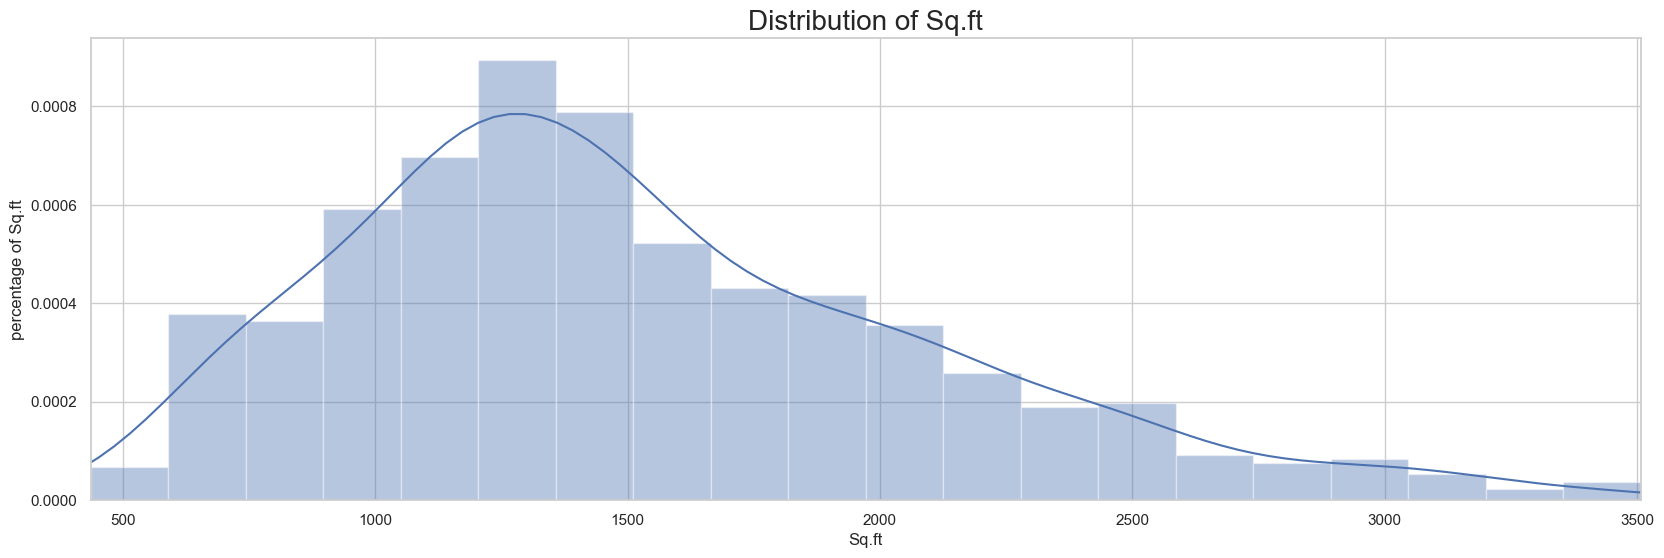

In [15]:
#Distribution of Sq.ft
plt.figure(figsize=(20, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Sq.ft'])
plt.title('Distribution of Sq.ft', fontsize = 20)

min_sqft = df['Sq.ft'].min()
max_sqft = df['Sq.ft'].max()
plt.xlim(min_sqft, max_sqft)

plt.xlabel('Sq.ft')
plt.ylabel('percentage of Sq.ft')

                       mean     median  size
Sq.ft                                       
(436.0, 831.8]    569386.95  579000.00    85
(831.8, 1036.8]   743254.59  699800.00    86
(1036.8, 1182.8]  878226.49  854940.00    86
(1182.8, 1286.6] 1000181.10  995000.00    86
(1286.6, 1412.0] 1140016.43 1150000.00    87
(1412.0, 1550.0] 1167785.03 1199500.00    86
(1550.0, 1757.0] 1330053.10 1275000.00    87
(1757.0, 2000.0] 1454602.50 1392238.50    86
(2000.0, 2368.0] 1675765.44 1599999.00    85
(2368.0, 3507.0] 1749524.28 1739000.00    85


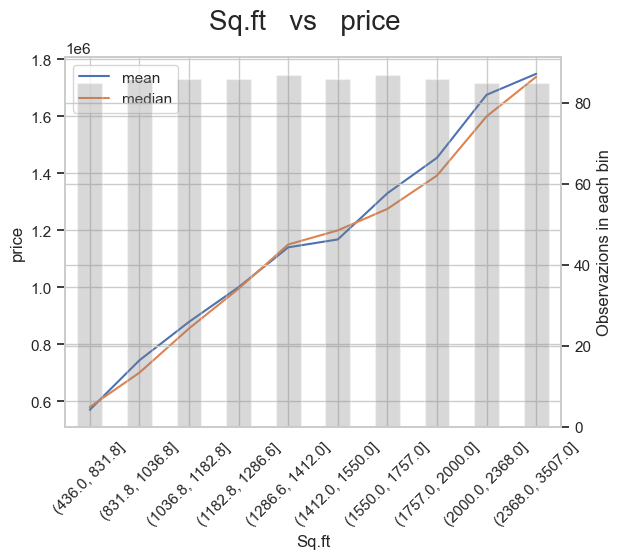

In [16]:
x, y = "Sq.ft", "price"
### bin plot
df_noNan = df[df[x].notnull()]
breaks = np.quantile(df_noNan[x], q=np.linspace(0, 1, 11))
groups = df_noNan.groupby([pd.cut(df_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
print(groups)
fig, ax = plt.subplots()
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

Since the curve is not flat, it is clear that Sq_ft is predictive, there is a clear pattern: on average, the larger the house the higher the price, even though there are some outliers with an above-average size and a relatively low price.

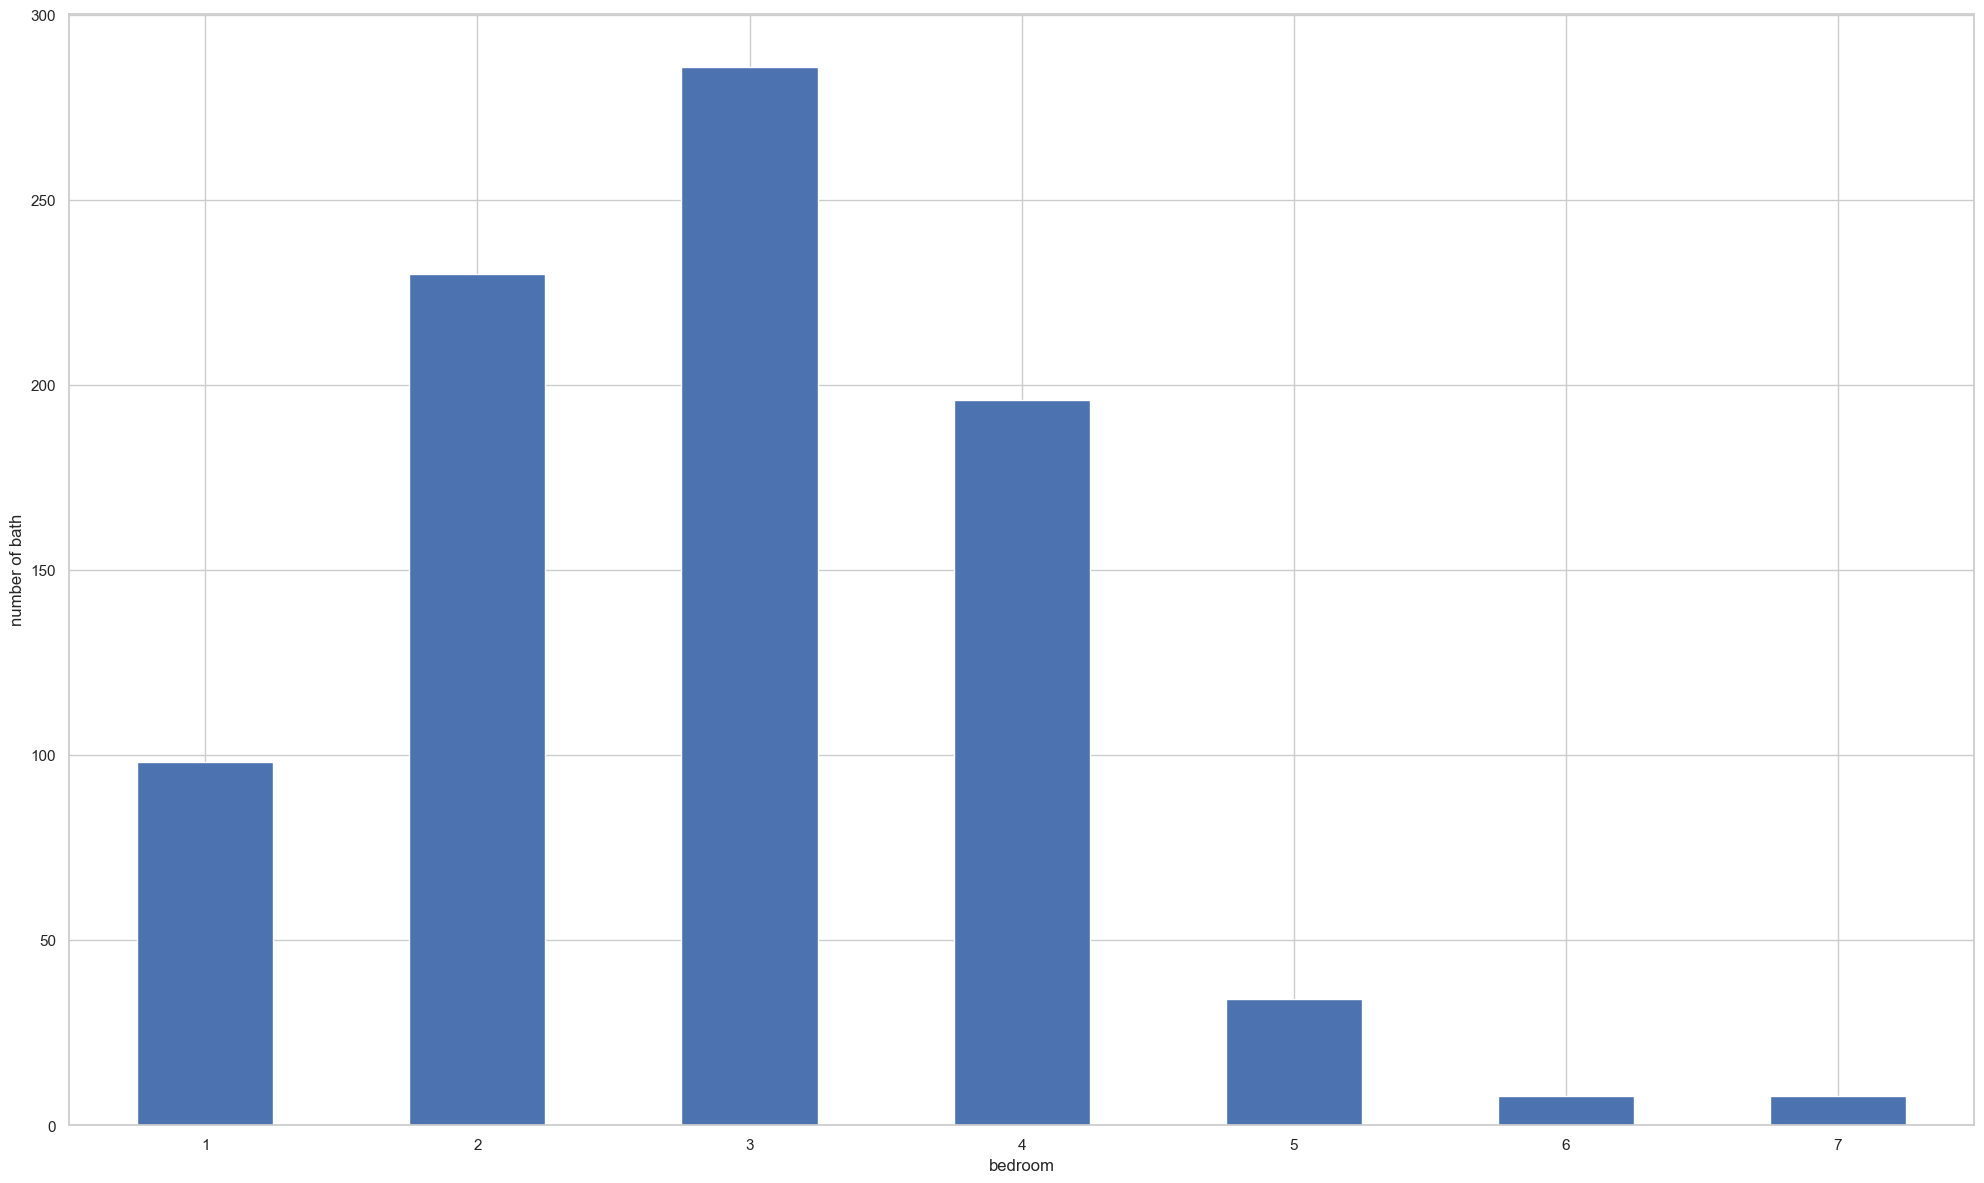

In [17]:
#bedroom count
ax = df.groupby('bedroom').count()['zipcode'].plot(kind='bar', figsize=[20, 12])
ax.set_ylabel('number of bath')
ax.set_xticklabels(['1','2','3','4','5','6','7'], rotation = 0)
plt.tight_layout()
plt.show()

The house with 2,3, 4 bedrooms dominate our dataset.

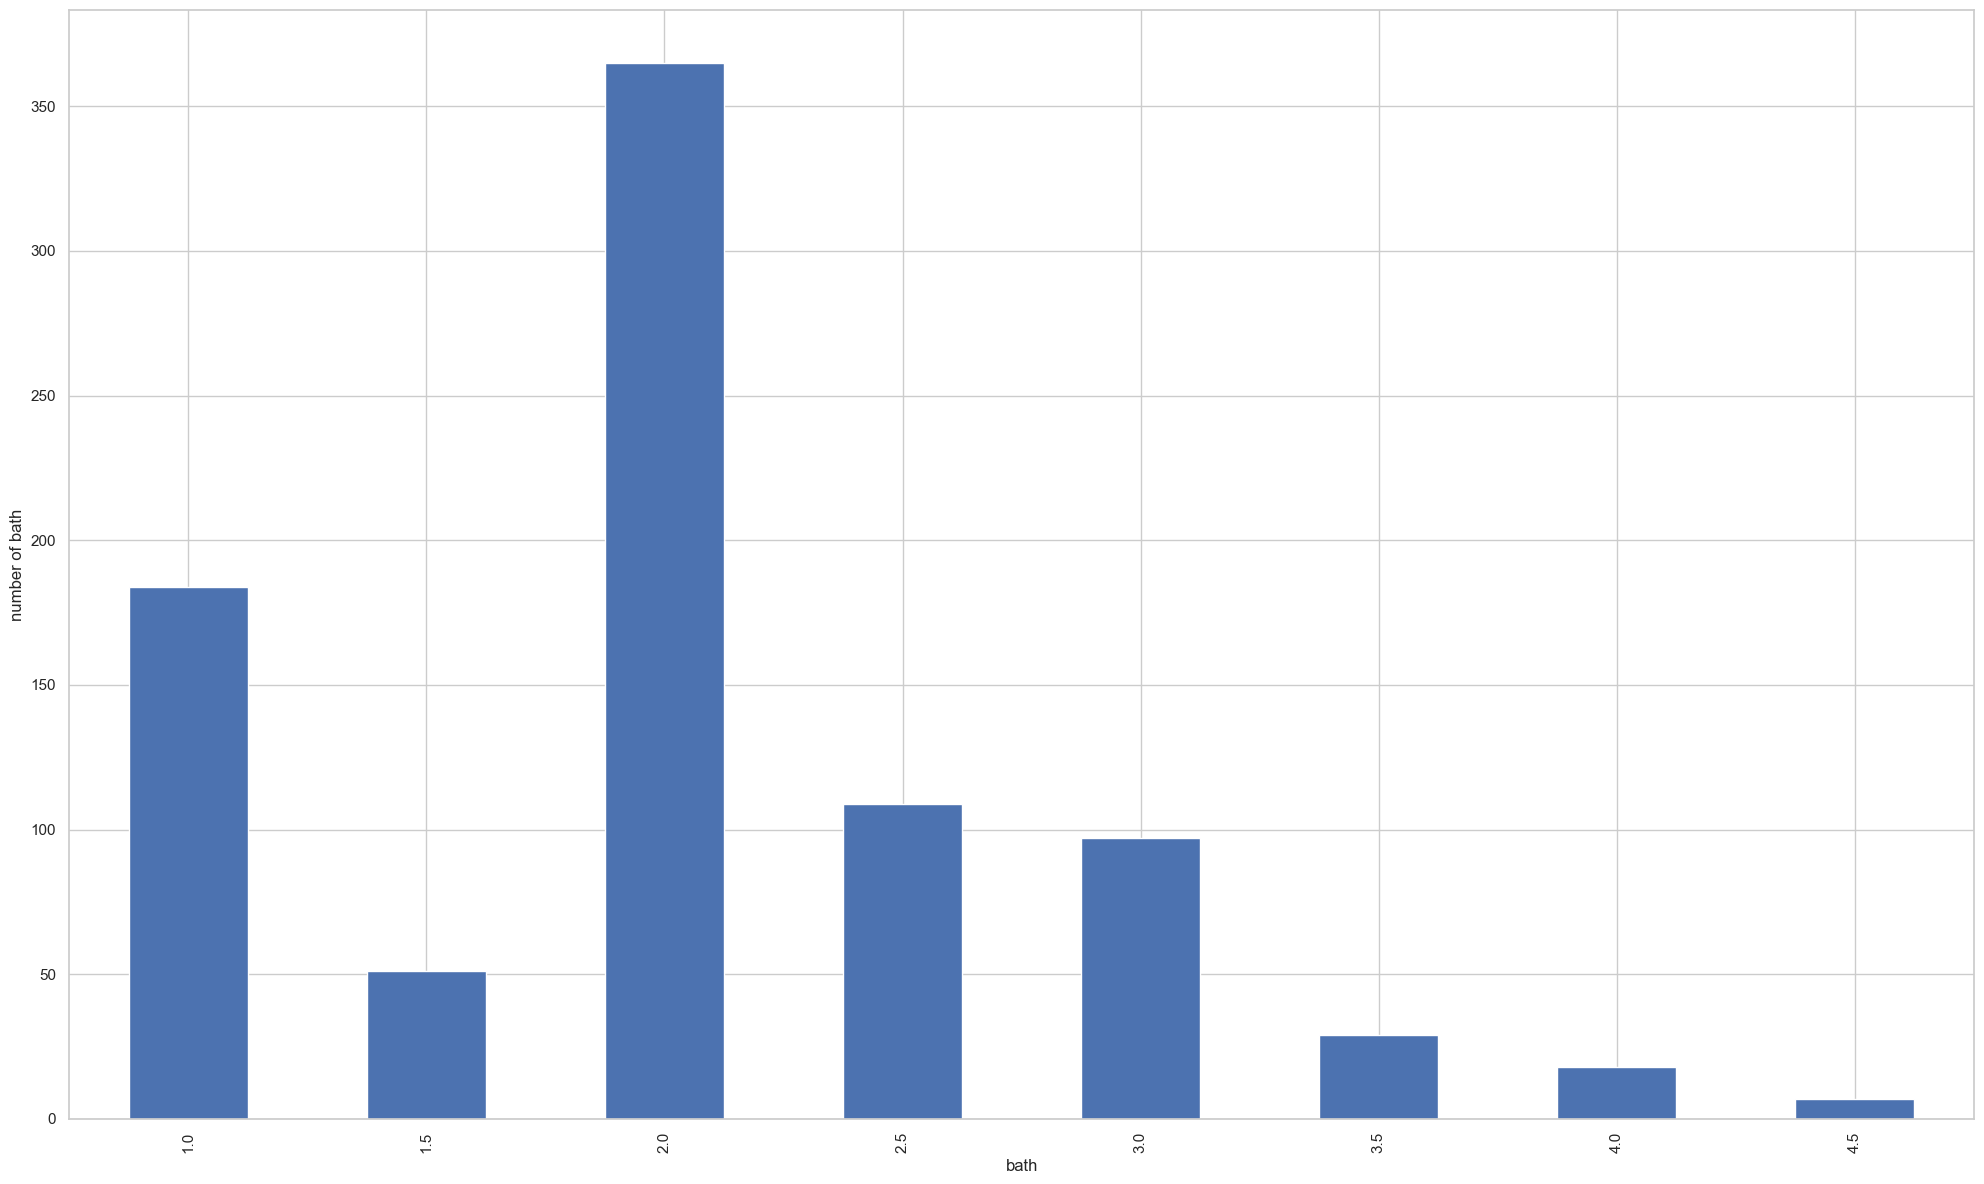

In [18]:
#bath count
ax = df.groupby('bath').count()['zipcode'].plot(kind='bar', figsize=[20, 12])
ax.set_ylabel('number of bath')
# ax.set_xticklabels(['1','2','3','4','5','6','7'], rotation = 0)
plt.tight_layout()
plt.show()

The house with 2 baths dominate our dataset.

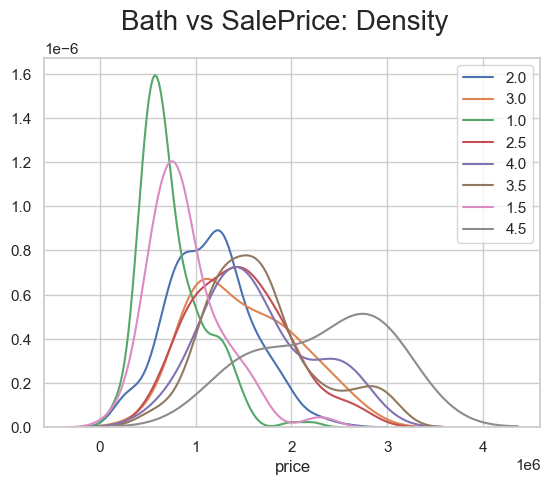

In [19]:
cat, num = "bath", "price"
fig, ax = plt.subplots()
fig.suptitle("Bath vs SalePrice: Density", fontsize=20)

for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label= i, ax=ax)
plt.legend()
ax.grid(True)

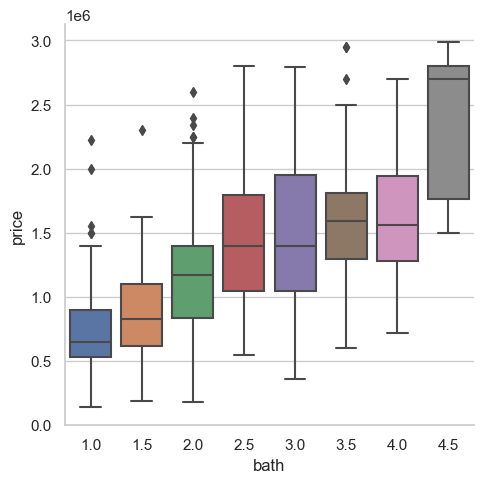

In [20]:
sns.catplot(x=cat, y=num, data=df, kind="box")
plt.show()

Number of Baths is predictive given that the distributions of the 8 samples are different in price levels and number of observations. It appears that the more bathrooms there are in the house the higher is the price.

However, the “eye intuition” may not be convincing enough since the observations in the 0 bathroom sample and in the 3 bathrooms sample contain very few observations. So we can use a one-way ANOVA test to check the statistical significance. Basically, it tests whether the means of two or more independent samples are significantly different, so if the p-value is small enough (<0.05) the null hypothesis of samples means equality can be rejected.


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(num+' ~ '+cat, data=df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


We can conclude that the number of bathrooms determines a higher price of the house. That makes sense as more bathrooms mean a bigger house and the size of the house is an important price factor.

# City Analysis

In [22]:
grouped_cities = df.groupby(['city']).median()
grouped_cities.sort_values(['price'],ascending=False)

,price,bedroom,bath,Sq.ft,price per Sq.Ft,bed_bath_ratio
city,,,,,,
Los Gatos,2462388.00,4.00,2.75,2295.50,1086.18,1.47
Union City,1889500.00,4.00,2.50,1868.00,987.17,1.67
Cupertino,1795000.00,3.00,2.00,1220.00,1471.31,1.50
Piedmont,1750000.00,3.50,2.00,2044.00,844.72,2.17
Campbell,1699999.00,3.00,2.50,2243.00,827.28,1.27
Berkeley,1546500.00,3.50,3.00,2140.00,756.19,1.25
San Mateo,1498000.00,3.00,2.00,1380.00,921.85,1.20
Milpitas,1479999.00,4.00,2.50,1769.00,782.70,1.60
Castro Valley,1400000.00,4.00,3.00,2376.00,589.23,1.33


In [23]:
# percentage 100 means all the houses collected in this city is not bath room sufficient
# NaN means all the houses collected in this city is bath room sufficient
df1=df[df['bed_bath_ratio'] > 1]
mk=df1['city'].value_counts()
bb_mk=df['city'].value_counts()
bed_bath_percentage = ((mk/bb_mk)*100).sort_values(ascending=True)
print(bed_bath_percentage)

Emeryville       25.00
Foster City      33.33
Berkeley         50.00
San Mateo        51.72
Fremont          53.41
San Francisco    56.05
Milpitas         66.67
Hayward          71.43
Oakland          75.72
San Jose         76.09
San Lorenzo     100.00
Piedmont        100.00
Alviso          100.00
Cupertino       100.00
Castro Valley   100.00
Campbell        100.00
Los Gatos       100.00
Union City      100.00
Alameda            NaN
Daly City          NaN
Santa Clara        NaN
Name: city, dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


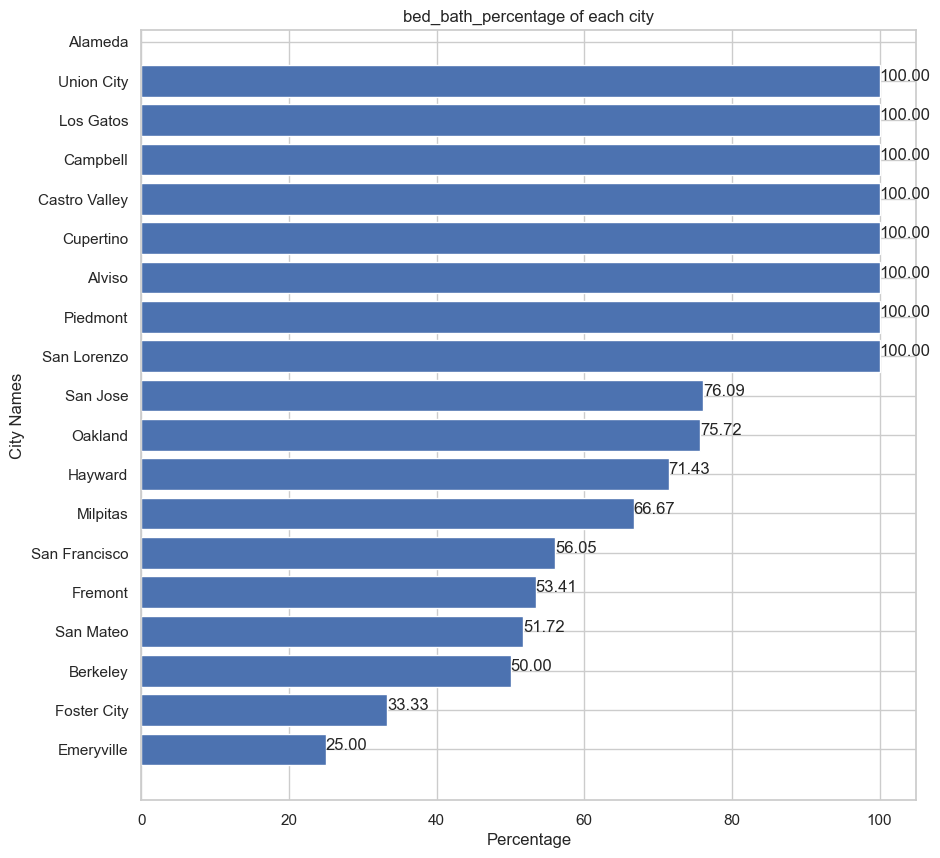

In [24]:
# horizontal bar chart for bed_bath_percentage of each city
plt.figure(figsize=(10,10))
# sort the grouped object by value in descending order
#bed_bath_percentage = bed_bath_percentage(ascending=True)

# create a horizontal bar chart of the count of records for each company
plt.barh(bed_bath_percentage.index, bed_bath_percentage)

# add axis labels and title
plt.xlabel('Percentage')
plt.ylabel('City Names')
plt.title('bed_bath_percentage of each city')


for i, v in enumerate(bed_bath_percentage):
    plt.text(v, i, f'{v:.2f}')

# display the plot
plt.show()

#the warning occured by nan value 

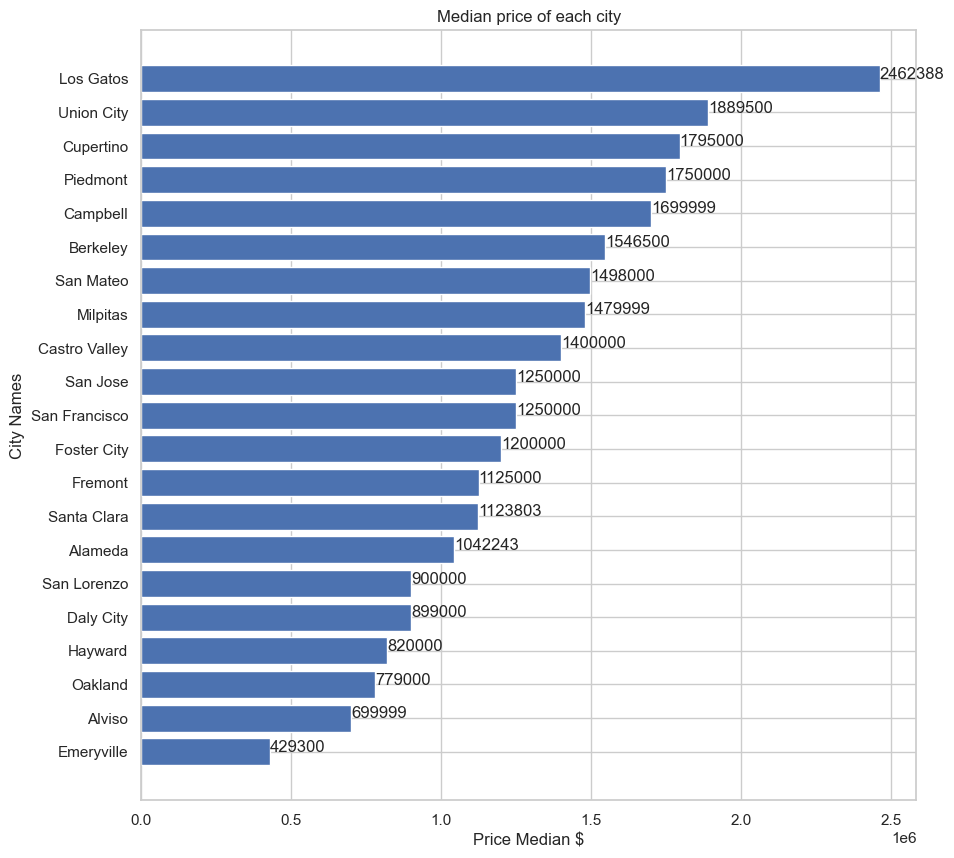

In [25]:
# median price in each cities
city_price = df.groupby('city')['price'].median().sort_values(ascending=True)

# horizontal bar chart 
plt.figure(figsize=(10,10))
# sort the grouped object by value in descending order
#bed_bath_percentage = bed_bath_percentage(ascending=True)

# create a horizontal bar chart of the count of records for each company
plt.barh(city_price.index, city_price)

# add axis labels and title
plt.xlabel('Price Median $')
plt.ylabel('City Names')
plt.title('Median price of each city')

for i, v in enumerate(city_price):
    plt.text(v, i, f'{v:.0f}')

# display the plot
plt.show()


There are more expensive houses in our dataset in LOS GATOS
There are more relatively cheap houses in our dataset in EMERYVILLE.

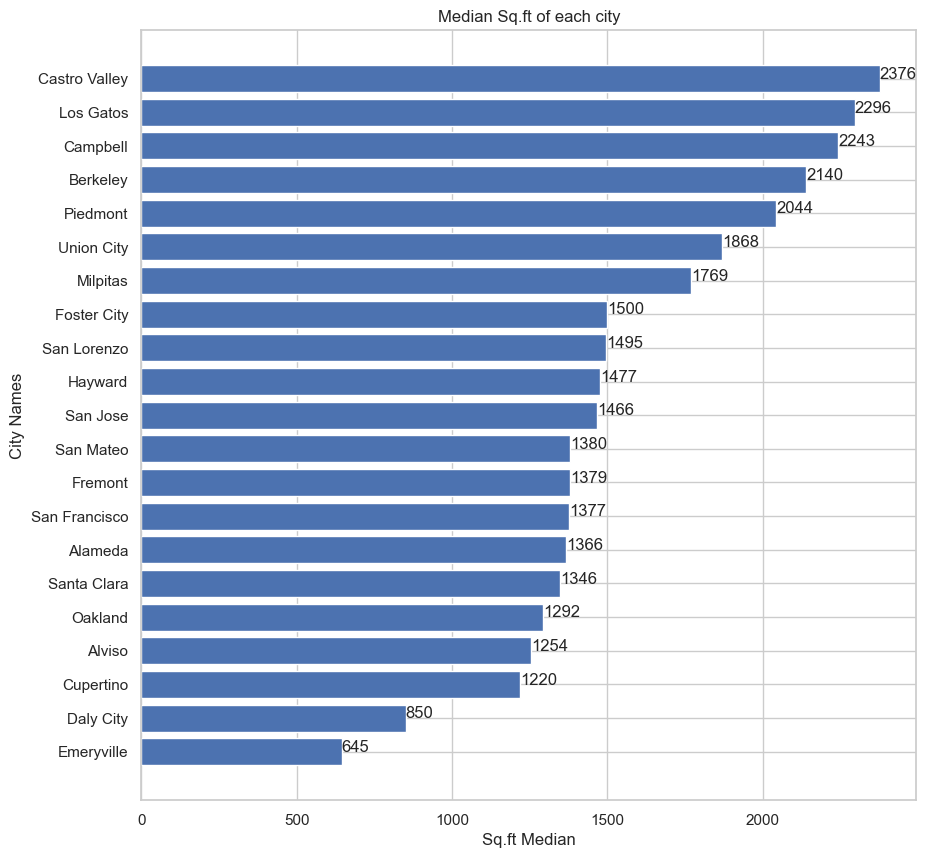

In [26]:
# median sq.ft in each cities
city_sq = df.groupby('city')['Sq.ft'].median().sort_values(ascending=True)
# horizontal bar chart 
plt.figure(figsize=(10,10))
# sort the grouped object by value in descending order
#bed_bath_percentage = bed_bath_percentage(ascending=True)

# create a horizontal bar chart of the count of records for each company
plt.barh(city_sq.index, city_sq)

# add axis labels and title
plt.xlabel('Sq.ft Median')
plt.ylabel('City Names')
plt.title('Median Sq.ft of each city')

for i, v in enumerate(city_sq):
    plt.text(v, i, f'{v:.0f}')

# display the plot
plt.show()

In [27]:
# price per sq.ft median in each cities
city_price_sq = df.groupby('city')['price per Sq.Ft'].median().sort_values(ascending=True)

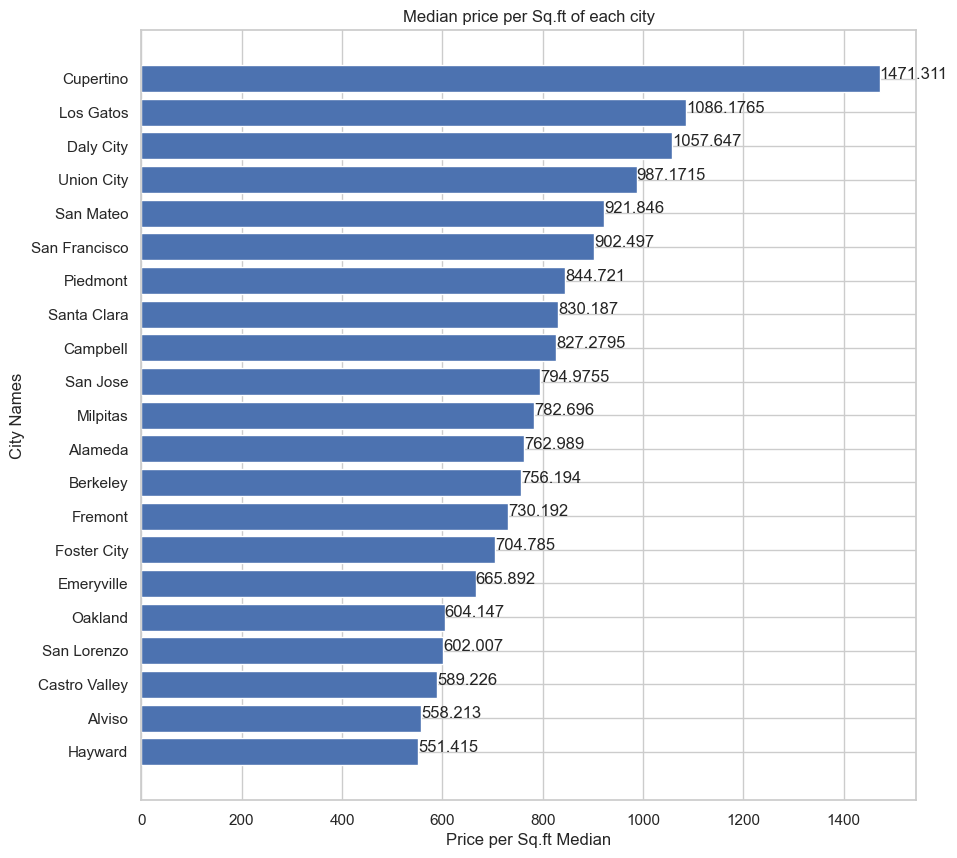

In [28]:
# horizontal bar chart 
plt.figure(figsize=(10,10))
# sort the grouped object by value in descending order
#bed_bath_percentage = bed_bath_percentage(ascending=True)

# create a horizontal bar chart of the count of records for each company
plt.barh(city_price_sq.index, city_price_sq)

# add axis labels and title
plt.xlabel('Price per Sq.ft Median')
plt.ylabel('City Names')
plt.title('Median price per Sq.ft of each city')

for i, v in enumerate(city_price_sq):
    plt.text(v, i, str(v))

# display the plot
plt.show()

In [29]:
compare= df['price_comparison'].value_counts()
print(compare)

higher    453
lower     399
equal       8
Name: price_comparison, dtype: int64


<AxesSubplot: >

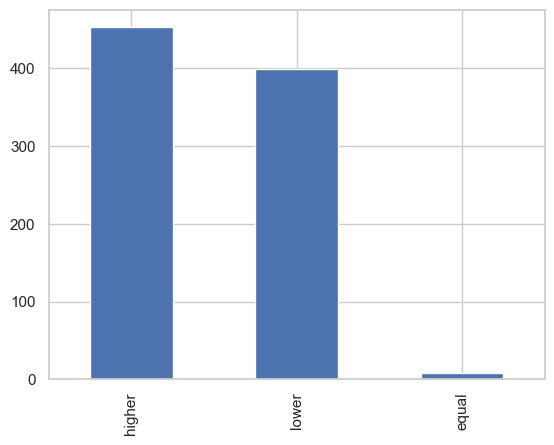

In [30]:
compare.plot.bar()

In [31]:
crosstab_result = pd.crosstab(df['city'], df['price_comparison'])
sorted_df = crosstab_result.sort_values(by='higher',ascending=False)
sorted_df.head(5)

price_comparison,equal,higher,lower
city,,,
San Jose,4,180,92
San Francisco,2,138,83
Fremont,0,46,42
Oakland,0,42,131
San Mateo,1,19,9


In [32]:
# Assuming you have a DataFrame named df with 'city' and 'price_comparison' columns
# Perform cross-tabulation and normalize by row (index)
crosstab_result = pd.crosstab(df['city'], df['price_comparison'], normalize='index')

# Convert the proportions to percentages
percentage_result = crosstab_result * 100

# Sort the percentage DataFrame by the 'higher' column in descending order
sorted_df = percentage_result.sort_values(by='higher', ascending=False)

# Print the sorted DataFrame with percentages
print(sorted_df)

price_comparison  equal  higher  lower
city                                  
Union City         0.00  100.00   0.00
Berkeley           0.00  100.00   0.00
Campbell           0.00  100.00   0.00
Castro Valley      0.00  100.00   0.00
Cupertino          0.00  100.00   0.00
Los Gatos          0.00  100.00   0.00
Milpitas           0.00  100.00   0.00
Piedmont           0.00  100.00   0.00
Foster City        0.00   66.67  33.33
San Mateo          3.45   65.52  31.03
San Jose           1.45   65.22  33.33
San Francisco      0.90   61.88  37.22
Fremont            0.00   52.27  47.73
Santa Clara        0.00   50.00  50.00
Oakland            0.00   24.28  75.72
Hayward            2.86   17.14  80.00
Alviso             0.00    0.00 100.00
San Lorenzo        0.00    0.00 100.00
Emeryville         0.00    0.00 100.00
Daly City          0.00    0.00 100.00
Alameda            0.00    0.00 100.00


In [33]:
# cities with sample size larger than 20 
cities = ['San Francisco','San Jose','Hayward','San Mateo','Oakland','Fremont']
filtered_df = df[df['city'].isin(cities)]
#filtered_df
average_price = filtered_df.groupby('city')['price'].mean().sort_values(ascending=False)
print(average_price)

city
San Mateo       1434023.03
San Francisco   1315716.86
San Jose        1251756.20
Fremont         1120328.00
Oakland          868713.79
Hayward          839164.09
Name: price, dtype: float64


The average house of each city(cites with sample size larger than 20) is shown above.

Some cities in our dataset contain too few records, thus excluded them from calculating the average price of house
in different cities.

In [34]:
house_sz= df['house_size'].value_counts()
print(house_sz)

small     487
medium    314
large      59
Name: house_size, dtype: int64


<AxesSubplot: >

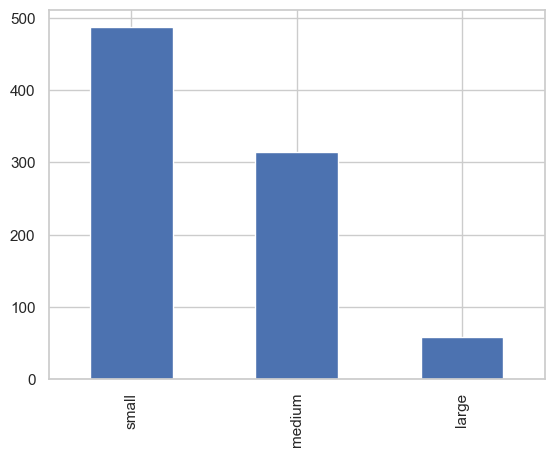

In [35]:
house_sz.plot.bar()

In [36]:
crosstab_result_sz = pd.crosstab(df['city'], df['house_size'])
sorted_df = crosstab_result_sz.sort_values(by='small',ascending=False)
sorted_df.head(5)

house_size,large,medium,small
city,,,
San Jose,13,116,147
San Francisco,17,78,128
Oakland,21,45,107
Fremont,2,36,50
Hayward,0,16,19


In [37]:
df.columns

Index(['street', 'city', 'state', 'zipcode', 'price', 'bedroom', 'bath',
       'Sq.ft', 'price per Sq.Ft', 'house_size', 'bed_bath_ratio',
       'price_comparison'],
      dtype='object')

In [38]:
df = df.rename(columns={'price per Sq.Ft': 'price_per_SqFt'})
df = df.rename(columns={'Sq.ft': 'Sq_ft'})
df.columns

Index(['street', 'city', 'state', 'zipcode', 'price', 'bedroom', 'bath',
       'Sq_ft', 'price_per_SqFt', 'house_size', 'bed_bath_ratio',
       'price_comparison'],
      dtype='object')

In [39]:
df.head()

,street,city,state,zipcode,price,bedroom,bath,Sq_ft,price_per_SqFt,house_size,bed_bath_ratio,price_comparison
ID,,,,,,,,,,,,
1,1221 Harrison St #20,San Francisco,CA,94110,1035000.00,1,2.00,1439,719.25,small,0.50,lower
2,1714 24th Ave,San Francisco,CA,94122,2099000.00,5,3.00,2304,911.02,medium,1.67,higher
3,1934 - 1936 19th Ave,San Francisco,CA,94116,1395000.00,4,3.00,2740,509.12,large,1.33,higher
4,130 Wilson Ave,San Francisco,CA,94112,875000.00,4,3.00,1400,625.00,small,1.33,lower
5,1200 Gough St Unit 5 C,San Francisco,CA,94109,795000.00,1,1.00,840,946.43,small,1.00,lower


In [40]:
df.describe

<bound method NDFrame.describe of                            street           city state zipcode      price  \
ID                                                                          
1            1221 Harrison St #20  San Francisco    CA   94110 1035000.00   
2                   1714 24th Ave  San Francisco    CA   94122 2099000.00   
3            1934 - 1936 19th Ave  San Francisco    CA   94116 1395000.00   
4                  130 Wilson Ave  San Francisco    CA   94112  875000.00   
5          1200 Gough St Unit 5 C  San Francisco    CA   94109  795000.00   
..                            ...            ...   ...     ...        ...   
856  47112 Warm Springs Blvd #239        Fremont    CA   94539  420000.00   
857                  70 Delta Ter        Fremont    CA   94538  305000.00   
858            35364 Fremont Blvd        Fremont    CA   94536 1000000.00   
859      3698 Vision Cmn Unit 115        Fremont    CA   94538  724880.00   
860      3698 Vision Cmn Unit 109        F

# Feature Selection

Heat Map

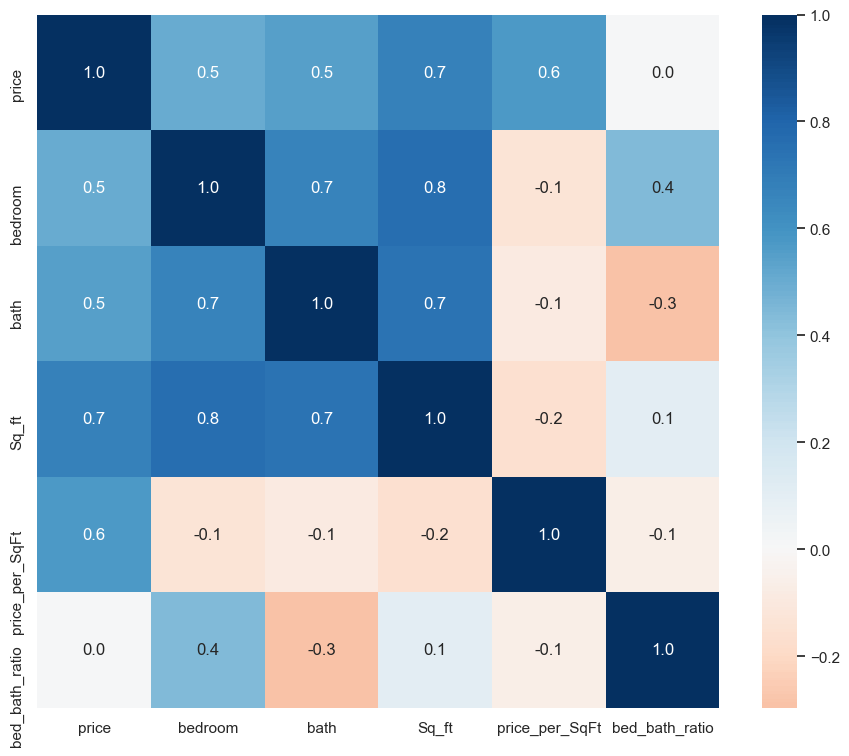

In [41]:
# Data Frame heat map

corr = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11, 9)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [42]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline


In [43]:
df1=df.copy()

In [44]:

predictors = ['city','bedroom', 'bath',
       'Sq_ft', 'price_per_SqFt']
outcome = 'price'

# partition data
X = pd.get_dummies(df1[predictors], drop_first=True)
y = df1[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #fixes code random_state

house_lm = LinearRegression()
house_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', house_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': house_lm.coef_}))

# print performance measures
regressionSummary(train_y, house_lm.predict(train_X))

intercept  -1123125.7111038093
             Predictor  coefficient
0              bedroom    -14224.16
1                 bath     39002.55
2                Sq_ft       707.48
3       price_per_SqFt      1480.88
4          city_Alviso     73968.01
5        city_Berkeley     16303.01
6        city_Campbell     57005.85
7   city_Castro Valley         0.00
8       city_Cupertino         0.00
9       city_Daly City        -0.00
10     city_Emeryville     53793.43
11    city_Foster City         0.00
12        city_Fremont     37805.39
13        city_Hayward     -2695.56
14      city_Los Gatos    302640.03
15       city_Milpitas     43589.14
16        city_Oakland      2880.67
17       city_Piedmont    208683.22
18  city_San Francisco    -17955.00
19       city_San Jose     40627.97
20    city_San Lorenzo     38613.26
21      city_San Mateo     61296.95
22    city_Santa Clara     11469.75
23     city_Union City    188563.90

Regression statistics

                      Mean Error (ME) : 0.000

In [45]:
pred_y = house_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, house_lm))
print('AIC : ', AIC_score(train_y, pred_y, house_lm))
print('BIC : ', BIC_score(train_y, pred_y, house_lm))

adjusted r2 :  0.9432256667261967
AIC :  13628.55999323565
BIC :  13738.958769138171


In [46]:
#measure perf on validation data
house_lm_pred = house_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': house_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - house_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, house_lm_pred)

     Predicted     Actual   Residual
ID                                  
642  739767.54  799000.00   59232.46
57  1592423.96 1650000.00   57576.04
483 2597236.55 2985000.00  387763.45
85   829810.94  819000.00  -10810.94
640  384666.78  499000.00  114333.22
755  701264.31  680000.00  -21264.31
35   920321.45  995000.00   74678.55
413 1712028.32 1799000.00   86971.68
4    835049.72  875000.00   39950.28
685 1243776.44  995000.00 -248776.44
60  1385231.03 1445000.00   59768.97
364 1448944.45 1399900.00  -49044.45
502 1372654.44 1349990.00  -22664.44
202 1377031.84 1295000.00  -82031.84
196 1513208.39 1428000.00  -85208.39
600  482193.28  600000.00  117806.72
269 1051146.60  995000.00  -56146.60
229 1618379.37 1575000.00  -43379.37
295  940249.99  948000.00    7750.01
449 1741731.96 1851933.00  110201.04

Regression statistics

                      Mean Error (ME) : -6296.9348
       Root Mean Squared Error (RMSE) : 143718.7401
            Mean Absolute Error (MAE) : 94968.9674
        

Random Forest

In [47]:
#Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                           street           city state zipcode      price  \
ID                                                                          
1            1221 Harrison St #20  San Francisco    CA   94110 1035000.00   
2                   1714 24th Ave  San Francisco    CA   94122 2099000.00   
3            1934 - 1936 19th Ave  San Francisco    CA   94116 1395000.00   
4                  130 Wilson Ave  San Francisco    CA   94112  875000.00   
5          1200 Gough St Unit 5 C  San Francisco    CA   94109  795000.00   
..                            ...            ...   ...     ...        ...   
856  47112 Warm Springs Blvd #239        Fremont    CA   94539  420000.00   
857                  70 Delta Ter        Fremont    CA   94538  305000.00   
858            35364 Fremont Blvd        Fremont    CA   94536 1000000.00   
859      3698 Vision Cmn Unit 115        Fremont    CA   94538  724880.00   
860      3698 Vision Cmn Unit 109        Fremont    CA   94538  529880.00   

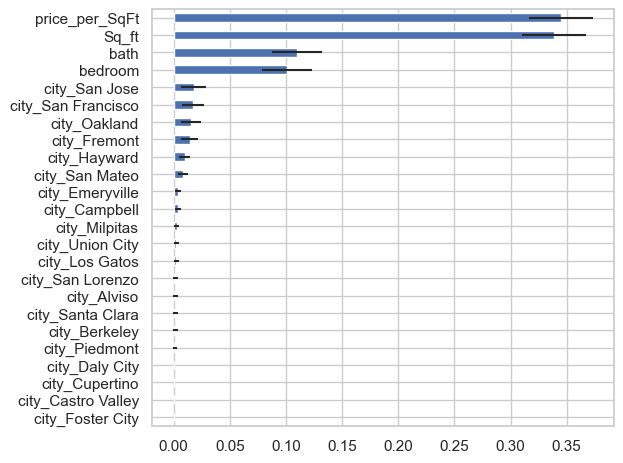

In [48]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df1 = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df1 = df1.sort_values('importance')
print(df)

ax = df1.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()


The importance ranking of the variables that influence the house price is shown above.

# Model

In addition to these questions we answered about through data visualization, we also tried to develope a model to
predict the house preice. However, we are aware of that this model is very simplistic because eventually we only included
two numerical variables from our dataset.In order to make this model more relavant for the real market, new data would 
need to be gathered and added to this model. However, since this is outside of the scope of our research questions, we only
have this simple model below.

In [49]:
# bedroom and bath are highly correlated with 'Sq.ft', thus not included in this model
import statsmodels.formula.api as smf

predictors = ['price_per_SqFt', 'Sq_ft']
outcome = 'price'

# partition data
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #fixes code random_state


formula = outcome + ' ~ ' + ' + '.join(predictors)
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     5972.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        21:28:35   Log-Likelihood:                -11405.
No. Observations:                 860   AIC:                         2.282e+04
Df Residuals:                     857   BIC:                         2.283e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.071e+06   2.12e+04    -50.

In [50]:
house_lm = LinearRegression()
house_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', house_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': house_lm.coef_}))

# print performance measures
regressionSummary(train_y, house_lm.predict(train_X))

intercept  -1113049.1366087596
        Predictor  coefficient
0  price_per_SqFt      1498.78
1           Sq_ft       729.04

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 131873.4784
            Mean Absolute Error (MAE) : 86970.7137
          Mean Percentage Error (MPE) : 0.5755
Mean Absolute Percentage Error (MAPE) : 10.0076


In [51]:
pred_y = house_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, house_lm))
print('AIC : ', AIC_score(train_y, pred_y, house_lm))
print('BIC : ', BIC_score(train_y, pred_y, house_lm))

adjusted r2 :  0.9395894713123589
AIC :  13639.209954956925
BIC :  13656.194382018852


In [52]:
#measure perf on validation data
house_lm_pred = house_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': house_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - house_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, house_lm_pred)

     Predicted     Actual   Residual
ID                                  
642  756013.54  799000.00   42986.46
57  1621664.87 1650000.00   28335.13
483 2527664.25 2985000.00  457335.75
85   844487.60  819000.00  -25487.60
640  376773.85  499000.00  122226.15
755  716257.07  680000.00  -36257.07
35   979690.51  995000.00   15309.49
413 1701416.81 1799000.00   97583.19
4    844338.95  875000.00   30661.05
685 1255192.16  995000.00 -260192.16
60  1432471.58 1445000.00   12528.42
364 1436130.05 1399900.00  -36230.05
502 1356693.09 1349990.00   -6703.09
202 1445356.12 1295000.00 -150356.12
196 1553036.93 1428000.00 -125036.93
600  511420.43  600000.00   88579.57
269 1007920.08  995000.00  -12920.08
229 1610175.70 1575000.00  -35175.70
295  930150.31  948000.00   17849.69
449 1736390.82 1851933.00  115542.18

Regression statistics

                      Mean Error (ME) : -7339.3715
       Root Mean Squared Error (RMSE) : 150157.8698
            Mean Absolute Error (MAE) : 94176.5820
        

In [53]:
pred_y = house_lm.predict(valid_X)

print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, house_lm))
print('AIC : ', AIC_score(valid_y, pred_y, house_lm))
print('BIC : ', BIC_score(valid_y, pred_y, house_lm))

adjusted r2 :  0.9212894512546882
AIC :  9184.806140426006
BIC :  9200.1687070555
